<a href="https://colab.research.google.com/github/DanielBrisch/Heartdiseases/blob/main/TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
tf.random.set_seed(31)

In [ ]:
versao_tensorflow = tf.__version__
print(f'TensorFlow instalado na versao: {versao_tensorflow}')

TensorFlow instalado na versao: 2.15.0


In [ ]:
peso = tf.Variable(tf.random.normal([1]), name='peso')
vies = tf.Variable(tf.random.normal([1], name='vies'))

In [ ]:
peso

<tf.Variable 'peso:0' shape=(1,) dtype=float32, numpy=array([-0.3594139], dtype=float32)>

In [ ]:
vies

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.15100643], dtype=float32)>

In [ ]:
print(f'Peso = {peso.numpy()}')
print(f'Vies = {vies.numpy()}')

Peso = [-0.3594139]
Vies = [0.15100643]


In [ ]:
def neuronio(x):
  z = tf.add(tf.multiply(x, peso), vies)
  return z

In [ ]:
exemplo = tf.constant(10)

In [ ]:
exemplo = tf.constant(10.0)

In [ ]:
neuronio(exemplo)

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([-3.4431324], dtype=float32)>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

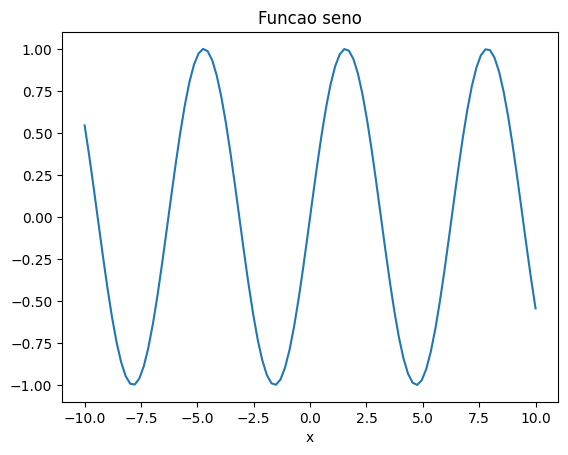

In [ ]:
def gera_grafico():
  x = np.linspace(-10, 10, 100)
  y = tf.sin(x)
  plt.plot(x, y)
  plt.xlabel('x')
  plt.title('Funcao seno')
  plt.show()

gera_grafico()

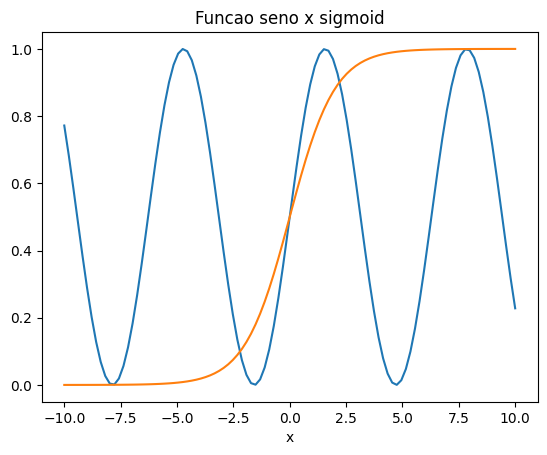

In [ ]:
def gera_grafico():
  x = np.linspace(-10, 10, 100)
  y = (tf.sin(x) + 1) / 2
  y2 = tf.sigmoid(x)

  plt.plot(x, y)
  plt.plot(x, y2)
  plt.xlabel('x')
  plt.title('Funcao seno x sigmoid')
  plt.show()

gera_grafico()


In [ ]:
pb = tf.sigmoid(neuronio(tf.constant([10.0])))
pb

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.03097433], dtype=float32)>

In [ ]:
 pb > 0.5

<tf.Tensor: shape=(1,), dtype=bool, numpy=array([False])>

In [ ]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
doenca_cardiaca = fetch_ucirepo(id=45)

X = doenca_cardiaca.data.features
X = X[['age', 'chol', 'cp']]

In [ ]:
pb = tf.sigmoid(neuronio(tf.constant(X['chol'], dtype = tf.float32)))

In [ ]:
(pb > 0.5)[:10]

<tf.Tensor: shape=(10,), dtype=bool, numpy=
array([False, False, False, False, False, False, False, False, False,
       False])>

In [ ]:
target = doenca_cardiaca.data.targets
target = (target > 0) * 1

In [ ]:
y = tf.constant(target, dtype=tf.float32)
y[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.]], dtype=float32)>

In [ ]:
calculadora_perda = tf.keras.losses.BinaryCrossentropy()

In [ ]:
perda = calculadora_perda(y_true = y, y_pred = pb)

<tf.Tensor: shape=(), dtype=float32, numpy=7.076132>

In [ ]:
perda

<tf.Tensor: shape=(), dtype=float32, numpy=7.076132>

In [ ]:
np.mean(y.numpy() == ((pb.numpy() > 0.5) * 1))

0.5412541254125413